In [138]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [176]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [140]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [170]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [171]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [172]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [173]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [174]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date

'2017-08-23'

In [196]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# conn = engine.connect()
# data_df = pd.read_sql("SELECT * FROM Measurement", conn)

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_year

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns = ["Date", "Precipitation"])
precipitation_df.set_index("Date", inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values("Date")

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


<AxesSubplot:xlabel='Date', ylabel='Inches'>

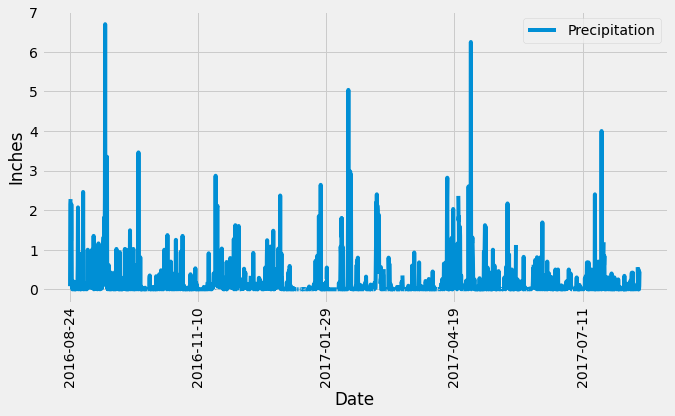

In [197]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(xlabel="Date", ylabel="Inches", rot=90, figsize=(10,5))

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [166]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station)
print(f"There are {stations.count()} stations.")

There are 9 stations.


In [167]:

# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

# LIST - active_stations[(Station, Count)]
most_active_station = active_stations[0][0]

for station in stations:
    if station.station == active_stations[0][0]:
        most_active_station_name = station.name
    
print(f"The most active station is as follows:")
print(f" Name    : {most_active_station_name}")
print(f" Station : {active_stations[0][0]}")
print(f" Count   : {active_stations[0][1]}")
print("")
print("List of the stations and the counts in descending order:")
print("Station        Counts")
print("-----------------------")
for active_stations in active_stations:
    print(f"{active_stations[0]}     {active_stations[1]}")

# Another way to print Station Data   
# for record in active_stations:
    # (station, count) = record
    # print(f"{station}     {count}")

The most active station is as follows:
 Name    : WAIHEE 837.5, HI US
 Station : USC00519281
 Count   : 2772

List of the stations and the counts in descending order:
Station        Counts
-----------------------
USC00519281     2772
USC00519397     2724
USC00513117     2709
USC00519523     2669
USC00516128     2612
USC00514830     2202
USC00511918     1979
USC00517948     1372
USC00518838     511


In [106]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

# LIST - temperature_data[(Low, High, Average)]
print(f"The Lowest, Highest and Average Temperature for the most active stations {most_active_station} is: ")
print(f" Low  : {temperature_data[0][0]}")
print(f" High : {temperature_data[0][1]}")
print(f" Avg  : {temperature_data[0][2]}")

The Lowest, Highest and Average Temperature for the most active stations USC00519281 is: 
 Low  : 54.0
 High : 85.0
 Avg  : 71.66378066378067


[Text(0.5, 0, 'Temperature')]

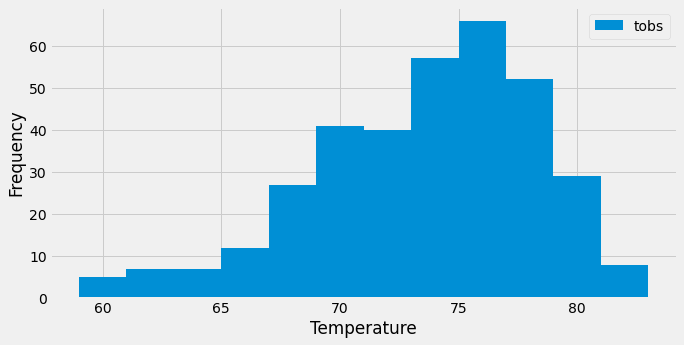

In [131]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).filter(Measurement.date >= last_year).\
    group_by(Measurement.date).all()

# LIST - results[(Date, Tobs)]
results_df = pd.DataFrame(results)
results_df.set_index("date")

results_df.plot(kind='hist', bins=12, figsize=(10,5)).set(xlabel="Temperature")

# Close session

In [195]:
# Close Session
session.close()